In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# To load the environment variable defined in the .env file
from dotenv import load_dotenv
load_dotenv();

In [75]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib.ticker as mtick

from sklearn.calibration import CalibrationDisplay
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

import src.features.build_features as FeaturesManager

In [4]:
seasons_year = [2015, 2016, 2017, 2018]
features_data = FeaturesManager.build_features(seasons_year)
features_data.sample(10)

,Game ID,Event Index,Period,Team,Shot Type,Shooter,Goalie,Strength,X,Y,...,Last event Y,Last event elapsed time,Last event distance,st_X,st_Y,Shot distance,Shot angle,Is Goal,Is Empty,Game seconds
60004,2016020985,277,2,Carolina Hurricanes (CAR),Wrist Shot,Sebastian Aho,Antti Raanta,NaN,40.0,16.0,...,-4.0,-209,118.697093,40.0,16.0,51.546096,18.083445,0,0,536
49075,2018020781,258,2,Chicago Blackhawks (CHI),Wrist Shot,Jonathan Toews,Carter Hutton,NaN,58.0,23.0,...,-12.0,-99,102.181212,58.0,23.0,38.600518,36.573031,0,0,1060
71336,2016021170,263,2,St. Louis Blues (STL),Wrist Shot,Patrik Berglund,Juuse Saros,NaN,-79.0,13.0,...,-14.0,-472,159.304739,79.0,-13.0,16.401219,52.431408,0,0,18
21475,2019020338,261,2,St. Louis Blues (STL),Wrist Shot,Jay Bouwmeester,David Rittich,NaN,-55.0,3.0,...,-22.0,353,28.653098,55.0,-3.0,34.132096,5.042451,0,0,853
8023,2015020135,341,1,Washington Capitals (WSH),Wrist Shot,Brooks Orpik,Marc-Andre Fleury,NaN,-13.0,-31.0,...,-10.0,-17,60.745370,13.0,31.0,82.079230,22.190289,0,0,1078
54580,2019020863,318,2,Tampa Bay Lightning (TBL),Snap Shot,Ondrej Palat,Elvis Merzlikins,NaN,70.0,-18.0,...,2.0,607,34.409301,70.0,-18.0,26.172505,43.451842,0,0,636
28574,2018020452,255,3,Arizona Coyotes (ARI),Wrist Shot,Richard Panik,Aaron Dell,Even,67.0,20.0,...,22.0,13,136.014705,67.0,20.0,29.732137,42.273689,1,0,345
5102,2018020081,312,2,Vancouver Canucks (VAN),Wrist Shot,Troy Stecher,Casey DeSmith,NaN,48.0,-11.0,...,15.0,371,110.113578,48.0,-11.0,42.449971,15.018361,0,0,392
430,2015020008,274,1,Edmonton Oilers (EDM),Backhand,Eric Gryba,Brian Elliott,NaN,-38.0,20.0,...,15.0,-716,34.365681,38.0,-20.0,54.781384,21.412969,0,0,447
16784,2015020283,353,1,Ottawa Senators (OTT),Wrist Shot,Chris Neil,Curtis McElhinney,NaN,81.0,32.0,...,24.0,-272,28.160256,81.0,32.0,32.984845,75.963757,0,0,869


In [5]:
distance_data = features_data[['Shot distance', 'Is Goal']].dropna()
X = distance_data['Shot distance'].to_numpy().reshape(-1, 1)
y = distance_data['Is Goal'].to_numpy().reshape(-1, 1)

In [6]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

In [8]:
accuracy = clf.score(X_valid, y_valid)
print(f'Accuracy on validation set = {np.around(100.*accuracy, 2)}%')

Accuracy on validation set = 90.67%


0.9066831583334454
Dumb Accuracy on validation set = 90.67%


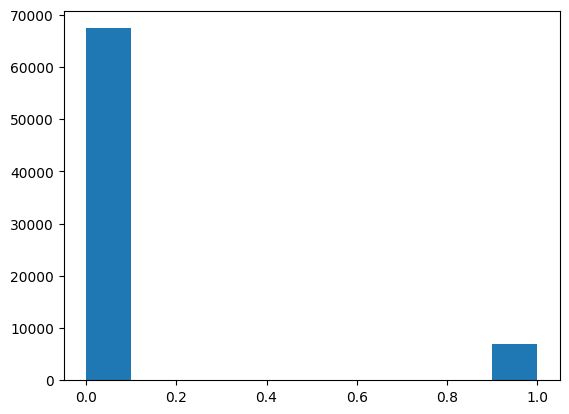

In [9]:
# Accuracy is not the right metric to use, as the classes are unbalanced
num_goals = (y_valid==1).sum()
num_no_goals = (y_valid==0).sum()
print(num_no_goals / (num_no_goals+num_goals))
plt.hist(y_valid);

# A dumb model that predicts 0 (no goals) all the time reach the same level of performance
def dumb_model(X, y):
    pred = np.zeros_like(X)
    return (y == pred).mean()


dumb_accuracy = dumb_model(X_valid, y_valid)
print(f'Dumb Accuracy on validation set = {np.around(100.*dumb_accuracy, 2)}%')

In [10]:
y_proba = clf.predict_proba(X_valid)
y_proba_no_goals = y_proba[:,0]
y_proba_goals = y_proba[:,1]

In [11]:
fpr, tpr, _ = roc_curve(y_valid, y_proba_goals)
roc_auc = auc(fpr, tpr)

fpr, tpr, _ = roc_curve(y_valid.ravel(), y_proba_goals.ravel())
roc_auc = auc(fpr, tpr)

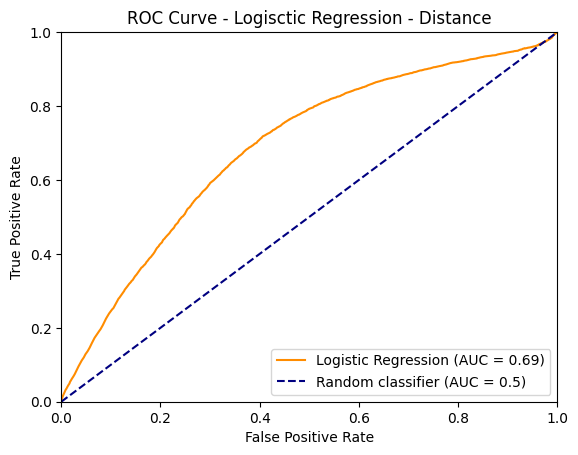

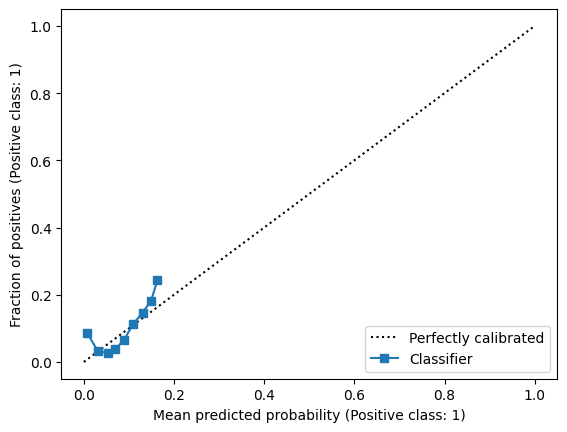

In [42]:
distance_data = features_data[['Shot distance', 'Is Goal']].dropna()
X = distance_data['Shot distance'].to_numpy().reshape(-1, 1)
y = distance_data['Is Goal'].to_numpy().reshape(-1, 1)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

clf = LogisticRegression(random_state=0).fit(X_train, y_train)

y_proba = clf.predict_proba(X_valid)
y_proba_no_goals = y_proba[:,0]
y_proba_goals = y_proba[:,1]

fpr, tpr, _ = roc_curve(y_valid, y_proba_goals)
roc_auc = auc(fpr, tpr)

fpr, tpr, _ = roc_curve(y_valid.ravel(), y_proba_goals.ravel())
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color="darkorange", label="Logistic Regression (AUC = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], color="navy", label='Random classifier (AUC = 0.5)', linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logisctic Regression - Distance")
plt.legend(loc="lower right")
plt.show()

disp = CalibrationDisplay.from_predictions(y_valid, y_proba_goals, n_bins=50)

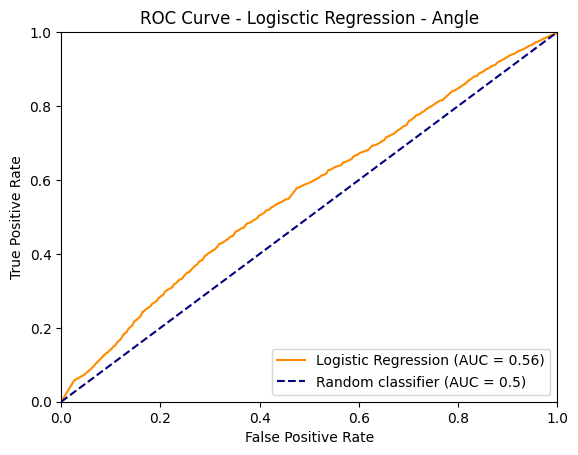

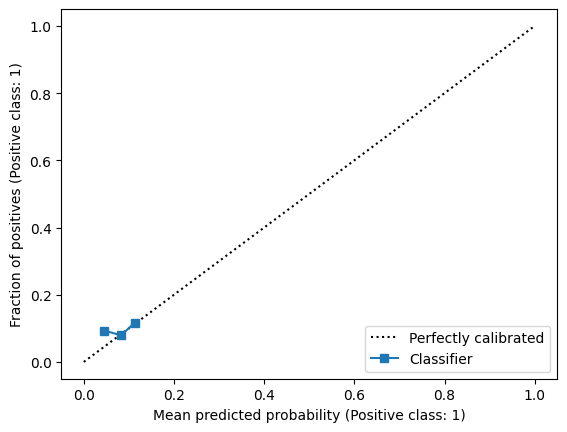

In [78]:
angle_data = features_data[['Shot angle', 'Is Goal']].dropna()
X = angle_data['Shot angle'].to_numpy().reshape(-1, 1)
y = angle_data['Is Goal'].to_numpy().reshape(-1, 1)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

clf = LogisticRegression(random_state=0).fit(X_train, y_train)

y_proba = clf.predict_proba(X_valid)
y_proba_no_goals = y_proba[:,0]
y_proba_goals = y_proba[:,1]

fpr, tpr, _ = roc_curve(y_valid, y_proba_goals)
roc_auc = auc(fpr, tpr)
fpr, tpr, _ = roc_curve(y_valid.ravel(), y_proba_goals.ravel())
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color="darkorange", label="Logistic Regression (AUC = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], color="navy", label='Random classifier (AUC = 0.5)', linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logisctic Regression - Angle")
plt.legend(loc="lower right")
plt.show()

disp = CalibrationDisplay.from_predictions(y_valid, y_proba_goals, n_bins=20)


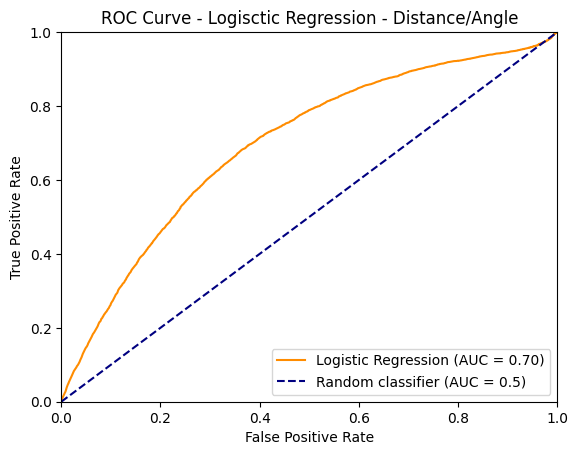

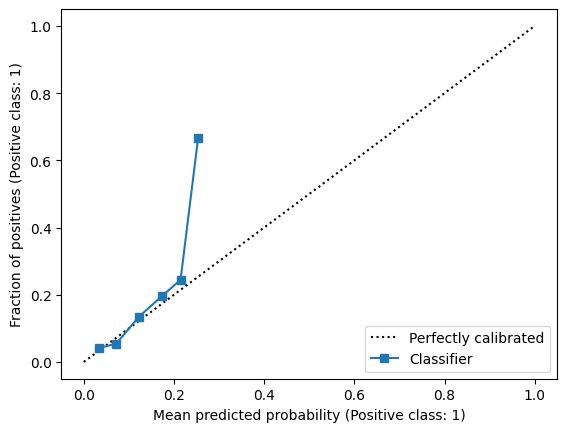

In [77]:
distance_angle_data = features_data[['Shot distance', 'Shot angle', 'Is Goal']].dropna()
X = distance_angle_data[['Shot distance', 'Shot angle']].to_numpy()
y = distance_angle_data['Is Goal'].to_numpy().reshape(-1, 1)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

clf = LogisticRegression(random_state=0).fit(X_train, y_train)

y_proba = clf.predict_proba(X_valid)
y_proba_no_goals = y_proba[:,0]
y_proba_goals = y_proba[:,1]

fpr, tpr, _ = roc_curve(y_valid, y_proba_goals)
roc_auc = auc(fpr, tpr)
fpr, tpr, _ = roc_curve(y_valid.ravel(), y_proba_goals.ravel())
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color="darkorange", label="Logistic Regression (AUC = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], color="navy", label='Random classifier (AUC = 0.5)', linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logisctic Regression - Distance/Angle")
plt.legend(loc="lower right")
plt.show()

disp = CalibrationDisplay.from_predictions(y_valid, y_proba_goals, n_bins=20)

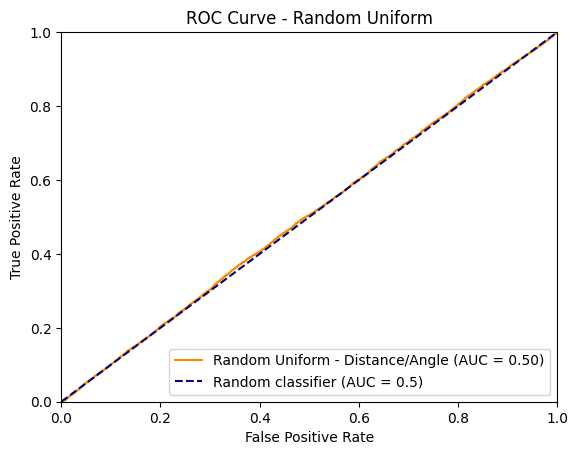

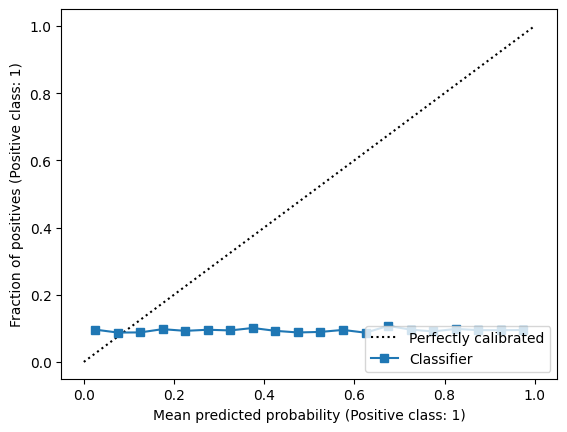

In [79]:
distance_angle_data = features_data[['Shot distance', 'Shot angle', 'Is Goal']].dropna()
X = distance_angle_data[['Shot distance', 'Shot angle']].to_numpy()
y = distance_angle_data['Is Goal'].to_numpy().reshape(-1, 1)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)


y_proba = np.random.uniform(low=0.0, high=1.0, size=len(y_valid))
y_proba_no_goals = y_proba
y_proba_goals = 1 - y_proba

fpr, tpr, _ = roc_curve(y_valid, y_proba_goals)
roc_auc = auc(fpr, tpr)
fpr, tpr, _ = roc_curve(y_valid.ravel(), y_proba_goals.ravel())
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color="darkorange", label="Random Uniform - Distance/Angle (AUC = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], color="navy", label='Random classifier (AUC = 0.5)', linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Uniform")
plt.legend(loc="lower right")
plt.show()

disp = CalibrationDisplay.from_predictions(y_valid, y_proba_goals, n_bins=20)

In [93]:
# print(y_valid)
# print(y_proba_goals)

ind = (y_proba_goals > 0.2) * (y_proba_goals <= 0.6)
print((y_valid[ind] == 1).sum())
print((y_valid[ind] == 0).sum())

print( (y_valid[ind] == 1).sum() / (y_valid[ind] == 0).sum() )

2767
26850
0.10305400372439479


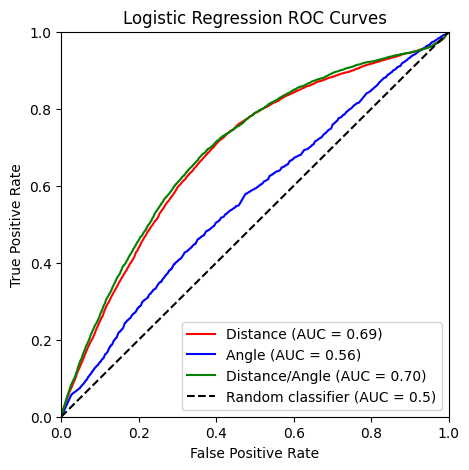

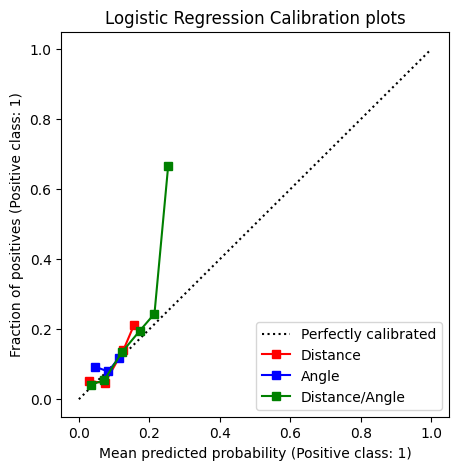

In [74]:
distance_data = features_data[['Shot distance', 'Shot angle', 'Is Goal']].dropna()
X = distance_data[['Shot distance', 'Shot angle']].to_numpy().reshape(-1, 2)
y = distance_data['Is Goal'].to_numpy().reshape(-1, 1)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression - Distance only
X_distance_train, X_distance_valid = X_train[:,0].reshape(-1, 1), X_valid[:,0].reshape(-1, 1)
clf_distance = LogisticRegression(random_state=0).fit(X_distance_train, y_train)

y_proba_goals_distance = clf_distance.predict_proba(X_distance_valid)[:,1]
fpr_distance, tpr_distance, _ = roc_curve(y_valid.ravel(), y_proba_goals_distance.ravel())
roc_auc_distance = auc(fpr_distance, tpr_distance)

# Logistic Regression - Angle only
X_angle_train, X_angle_valid = X_train[:,1].reshape(-1, 1), X_valid[:,1].reshape(-1, 1)
clf_angle = LogisticRegression(random_state=0).fit(X_angle_train, y_train)

y_proba_goals_angle  = clf_angle.predict_proba(X_angle_valid)[:,1]
fpr_angle, tpr_angle, _ = roc_curve(y_valid.ravel(), y_proba_goals_angle.ravel())
roc_auc_angle = auc(fpr_angle, tpr_angle)

# Logistic Regression - Distance and Angle
X_distance_angle_train, X_distance_angle_valid = X_train, X_valid
clf_distance_angle = LogisticRegression(random_state=0).fit(X_distance_angle_train, y_train)

y_proba_goals_distance_angle  = clf_distance_angle.predict_proba(X_distance_angle_valid)[:,1]
fpr_distance_angle, tpr_distance_angle, _ = roc_curve(y_valid.ravel(), y_proba_goals_distance_angle.ravel())
roc_auc_distance_angle = auc(fpr_distance_angle, tpr_distance_angle)

plt.figure(figsize=(5, 5))
plt.plot(fpr_distance, tpr_distance, color="red", label="Distance (AUC = %0.2f)" % roc_auc_distance)
plt.plot(fpr_angle, tpr_angle, color="blue", label="Angle (AUC = %0.2f)" % roc_auc_angle)
plt.plot(fpr_distance_angle, tpr_distance_angle, color="green", label="Distance/Angle (AUC = %0.2f)" % roc_auc_distance_angle)
plt.plot([0, 1], [0, 1], color="black", label='Random classifier (AUC = 0.5)', linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression ROC Curves")
plt.legend(loc="lower right")
plt.show()



fig = plt.figure(figsize=(5, 5))
gs = GridSpec(2, 2)
ax_calibration_curve = fig.add_subplot(gs[:2, :2])
nbins = 20
calibration_displays = {
    CalibrationDisplay.from_predictions(y_valid, y_proba_goals_distance, n_bins=nbins, name='Distance', ax=ax_calibration_curve, color='red'),
    CalibrationDisplay.from_predictions(y_valid, y_proba_goals_angle, n_bins=nbins, name='Angle', ax=ax_calibration_curve, color='blue'),
    CalibrationDisplay.from_predictions(y_valid, y_proba_goals_distance_angle, n_bins=nbins, name='Distance/Angle', ax=ax_calibration_curve, color='green')
}
ax_calibration_curve.set_title("Logistic Regression Calibration plots");


In [158]:
# Logistic Regression - Distance and Angle
X_distance_angle_train, X_distance_angle_valid = X_train, X_valid
clf_distance_angle = LogisticRegression(random_state=0).fit(X_distance_angle_train, y_train)

y_proba_goals_distance_angle  = clf_distance_angle.predict_proba(X_distance_angle_valid)[:,1]

In [159]:
y_proba_goals_distance_angle.max()

0.26112108967001973

[ 0.          5.26315789 10.52631579 15.78947368 21.05263158 26.31578947
 31.57894737 36.84210526 42.10526316 47.36842105 52.63157895 57.89473684
 63.15789474 68.42105263 73.68421053 78.94736842 84.21052632 89.47368421
 94.73684211]


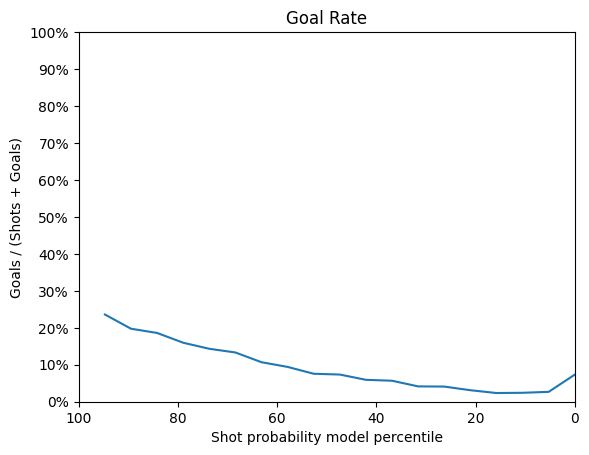

In [263]:
x = np.linspace(0, 100, 20)
percentiles_distance = [np.percentile(y_proba_goals_distance, i) for i in x]
percentiles_angle = [np.percentile(y_proba_goals_angle, i) for i in x]
percentiles_distance_angle = [np.percentile(y_proba_goals_distance_angle, i) for i in x]

goals_over_total_distance = []
goals_over_total_angle = []
goals_over_total_distance_angle = []

for count_p, _ in enumerate(x[:-1]):

    ind = (y_proba_goals_distance >= percentiles_distance[count_p]) & (y_proba_goals_distance < percentiles_distance[count_p+1])
    num_goals = (y_valid[ind] == 1).sum()
    num_no_goals = (y_valid[ind] == 0).sum()
    ratio = num_goals / (num_goals + num_no_goals)
    goals_over_total_distance.append(100.*ratio)

    ind = (y_proba_goals_angle >= percentiles_angle[count_p]) & (y_proba_goals_angle < percentiles_angle[count_p+1])
    num_goals = (y_valid[ind] == 1).sum()
    num_no_goals = (y_valid[ind] == 0).sum()
    ratio = num_goals / (num_goals + num_no_goals)
    goals_over_total_angle.append(100.*ratio)

    ind = (y_proba_goals_distance_angle >= percentiles_distance_angle[count_p]) & (y_proba_goals_distance_angle < percentiles_distance_angle[count_p+1])
    num_goals = (y_valid[ind] == 1).sum()
    num_no_goals = (y_valid[ind] == 0).sum()
    ratio = num_goals / (num_goals + num_no_goals)
    goals_over_total_distance_angle.append(100.*ratio)

goals_over_total_distance = np.array(goals_over_total_distance)
goals_over_total_angle = np.array(goals_over_total_angle)
goals_over_total_distance_angle = np.array(goals_over_total_distance_angle)

X = x[0:-1]
Y1 = goals_over_total_distance
Y2 = goals_over_total_angle
Y3 = goals_over_total_distance_angle


fig = plt.figure()

ax = fig.add_subplot(1,1,1)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.plot(X, Y1)
plt.plot(X, Y2)
plt.plot(X, Y3)
plt.title('Goal Rate')
plt.xlabel('Shot probability model percentile')
plt.ylabel('Goals / (Shots + Goals)')
plt.xlim([100.0, 0.0])
plt.ylim([0.0, 100.0])
plt.yticks(range(0, 110, 10));


[9.58941345e+01 9.44062947e+01 9.30472103e+01 9.17310443e+01
 8.99856938e+01 8.76967096e+01 8.53648069e+01 8.22174535e+01
 7.88841202e+01 7.47639485e+01 7.05150215e+01 6.52360515e+01
 5.93276109e+01 5.17739628e+01 4.37768240e+01 3.49070100e+01
 2.44349070e+01 1.35336195e+01 1.43061516e-02]


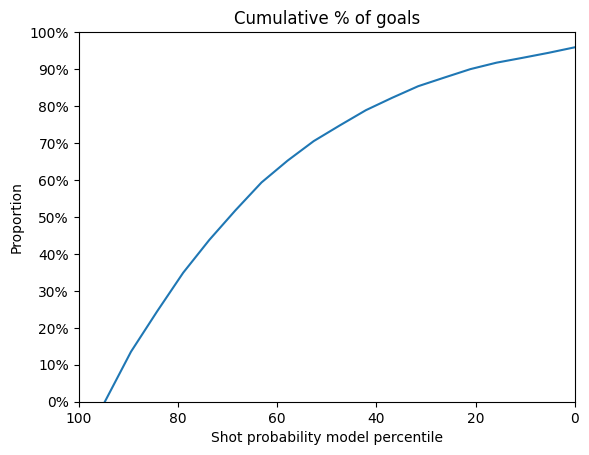

In [265]:
x = np.linspace(0, 100, 20)
percentiles = [np.percentile(y_proba_goals_distance_angle, i) for i in x]

num_total_goals = (y_valid == 1).sum()
goals_ratio = []

for count_p, p in enumerate(percentiles[:-1]):

    ind = (y_proba_goals_distance_angle >= percentiles[count_p]) & (y_proba_goals_distance_angle < percentiles[count_p+1])
    num_goals = (y_valid[ind] == 1).sum()

    ratio = num_goals / num_total_goals
    goals_ratio.append(100.*ratio)

goals_ratio = np.array(goals_ratio)
goals_ratio_cumul = np.cumsum(goals_ratio)


X = x[0:-1]
Y = 100-goals_ratio_cumul

print(Y)

fig = plt.figure()

ax = fig.add_subplot(1,1,1)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.plot(X, Y)
plt.title('Cumulative % of goals')
plt.xlabel('Shot probability model percentile')
plt.ylabel('Proportion')
plt.xlim([100.0, 0.0])
plt.ylim([0.0, 100.0])
plt.yticks(range(0, 110, 10));
